# 0x06 Regularization and Normalization

## 1. Regularization

Regularization is a technique used to prevent overfitting in machine learning models. 

In a nutshell, it adds a penalty term to the loss function, discouraging complex models that fit the training data too closely.

Before we dive into the regularization techniques, let us first construct a sample overfitted model.

We use such setup: Construct a dataset that is sampled from noisy sine wave, and then fit a polynomial regression model to it.

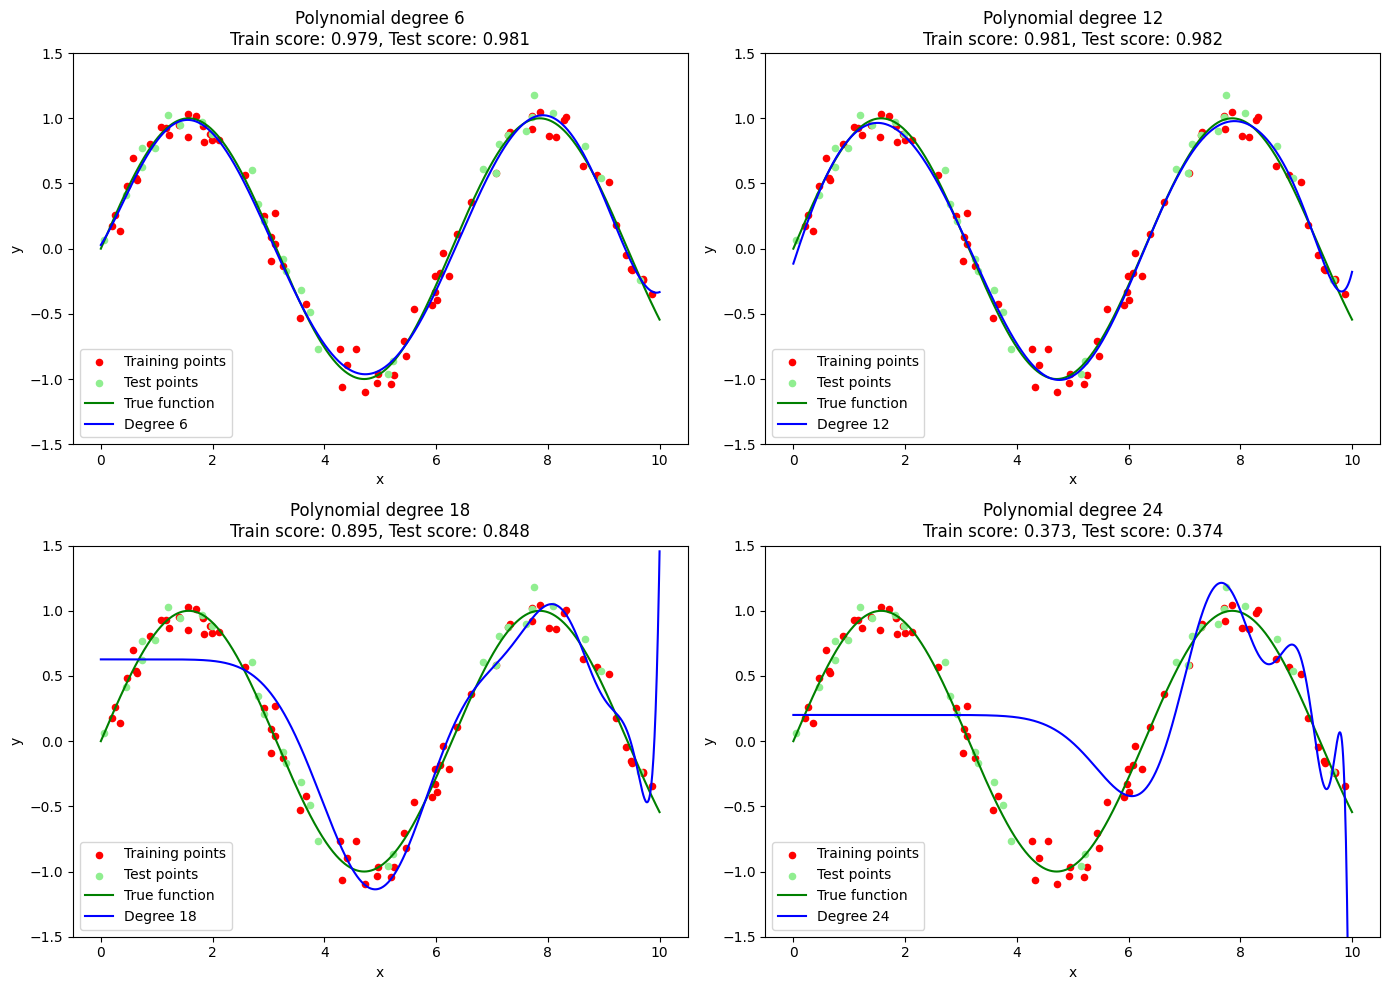

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate sine wave data with some noise
np.random.seed(42)
n_samples = 100
X = np.sort(np.random.uniform(0, 10, n_samples))[:, np.newaxis]
y = np.sin(X[:, 0]) + np.random.normal(0, 0.1, n_samples)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create models with different degrees of polynomial features
degrees = [6, 12, 18, 24]
models = [make_pipeline(PolynomialFeatures(degree), LinearRegression()) for degree in degrees]

# Fit models and calculate training and test scores
train_scores = []
test_scores = []
for model in models:
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

# Create fine-grained points for plotting the models' predictions
X_plot = np.linspace(0, 10, 1000)[:, np.newaxis]
y_plot = np.sin(X_plot[:, 0])  # True function without noise

# Plot the data and models
plt.figure(figsize=(14, 10))

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)
    plt.scatter(X_train, y_train, color='red', s=20, label='Training points')
    plt.scatter(X_test, y_test, color='lightgreen', s=20, label='Test points')
    plt.plot(X_plot, y_plot, color='green', label='True function')
    
    y_pred = models[i].predict(X_plot)
    plt.plot(X_plot, y_pred, color='blue', label=f'Degree {degree}')
    
    plt.title(f"Polynomial degree {degree}\nTrain score: {train_scores[i]:.3f}, Test score: {test_scores[i]:.3f}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

We can see that the model is overfitting the data when the degree goes up, as it captures the noise in the dataset. Let us pick the degree-24 polynomial as today's example.

In [2]:
deg24 = models[3]
print(deg24)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=24)),
                ('linearregression', LinearRegression())])


### 1.1 L1 and L2 Regularizations

L1 regularization, also known as Lasso regularization, adds a penalty equal to the absolute value of the magnitude of coefficients.
$$
L(w) = L_0(w) + \lambda \sum_{i=1}^{n} |w_i|
$$

where $L_0(w)$ is the original loss function, $w$ are the model parameters, and $\lambda$ is the regularization strength.

In sklearn, L1 regularization can be implemented using the `Lasso` class from the `sklearn.linear_model` module.

In [3]:
from sklearn.linear_model import Lasso
# Specify the regularization strength for Lasso using alpha
deg24_l1 = make_pipeline(PolynomialFeatures(24), Lasso(alpha=0.1))
print(deg24_l1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=24)),
                ('lasso', Lasso(alpha=0.1))])


/Users/louishhy/Documents/GitHub/deeplearning-handson/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.385e+00, tolerance: 3.083e-03
  model = cd_fast.enet_coordinate_descent(


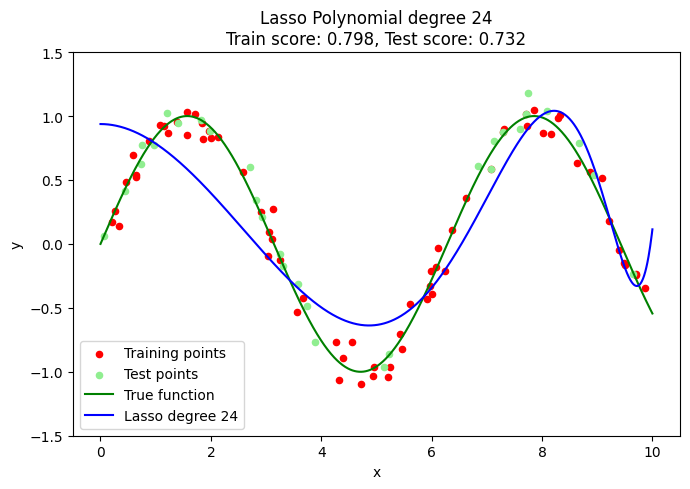

In [4]:
deg24_l1.fit(X_train, y_train)
y_pred_l1 = deg24_l1.predict(X_plot)
plt.figure(figsize=(7, 5))
plt.subplot(1, 1, 1)
plt.scatter(X_train, y_train, color='red', s=20, label='Training points')
plt.scatter(X_test, y_test, color='lightgreen', s=20, label='Test points')
plt.plot(X_plot, y_plot, color='green', label='True function')

plt.plot(X_plot, y_pred_l1, color='blue', label='Lasso degree 24')
plt.title(f"Lasso Polynomial degree 24\nTrain score: {deg24_l1.score(X_train, y_train):.3f}, Test score: {deg24_l1.score(X_test, y_test):.3f}")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

L2 regularization, also known as Ridge regularization, adds a penalty equal to the square of the magnitude of coefficients.
$$
L(w) = L_0(w) + \lambda \sum_{i=1}^{n} w_i^2
$$

where $L_0(w)$ is the original loss function, $w$ are the model parameters, and $\lambda$ is the regularization strength.

In sklearn, L2 regularization can be implemented using the `Ridge` class from the `sklearn.linear_model` module.

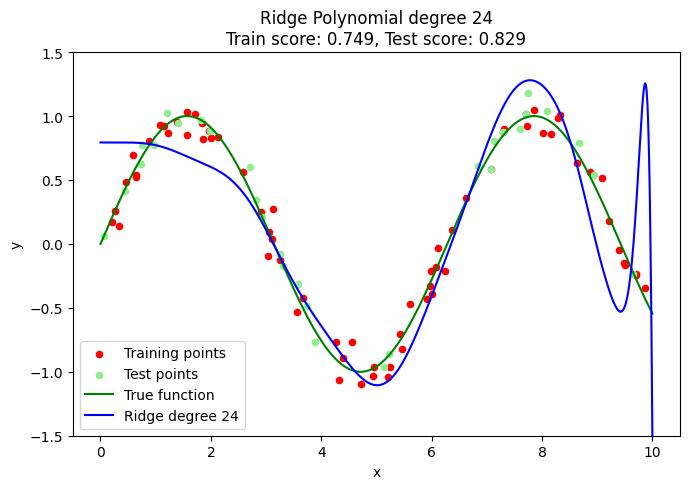

In [5]:
from sklearn.linear_model import Ridge

deg24_l2 = make_pipeline(PolynomialFeatures(24), Ridge(alpha=1))
deg24_l2.fit(X_train, y_train)
y_pred_l2 = deg24_l2.predict(X_plot)
plt.figure(figsize=(7, 5))
plt.subplot(1, 1, 1)
plt.scatter(X_train, y_train, color='red', s=20, label='Training points')
plt.scatter(X_test, y_test, color='lightgreen', s=20, label='Test points')
plt.plot(X_plot, y_plot, color='green', label='True function')
plt.plot(X_plot, y_pred_l2, color='blue', label='Ridge degree 24')
plt.title(f"Ridge Polynomial degree 24\nTrain score: {deg24_l2.score(X_train, y_train):.3f}, Test score: {deg24_l2.score(X_test, y_test):.3f}")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> 📚 **EXERCISE**
>
> - Try different regularization strengths and observe the difference between the regressor output and the true function. A recommended strategy to tweak the regularization strength is to use a logarithmic scale. For example, try $\lambda = 10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}$. What did you discover?

In [6]:
# === Your code here ===

Now, let's look into the weights of the models and compare between L1 and L2.

In [7]:
l1_linear_coefficients = deg24_l1.named_steps['lasso'].coef_
l2_linear_coefficients = deg24_l2.named_steps['ridge'].coef_
print("Lasso coefficients:", l1_linear_coefficients)
print("Ridge coefficients:", l2_linear_coefficients)

Lasso coefficients: [ 0.00000000e+00  0.00000000e+00 -1.67064698e-01  1.27663055e-02
  1.55627782e-03  4.20570904e-05 -1.78887552e-06 -4.30386174e-07
 -4.85358853e-08 -4.44285371e-09 -3.63765682e-10 -2.73727069e-11
 -1.88629700e-12 -1.14502263e-13 -5.30139817e-15 -3.73063300e-17
  3.46786868e-17  6.38212747e-18  8.52801500e-19  1.00483108e-19
  1.10658942e-20  1.16836187e-21  1.19860738e-22  1.20420187e-23
  1.19068915e-24]
Ridge coefficients: [ 0.00000000e+00 -2.99558882e-08 -1.29401277e-06 -2.38181084e-04
  2.13072951e-02 -4.70243909e-02 -2.02971574e-02  1.11948509e-02
  2.38950161e-02  3.77469094e-03 -1.96205991e-02 -1.90922878e-03
  1.75345490e-02 -1.44400956e-02  6.52958072e-03 -1.96274092e-03
  4.20493035e-04 -6.62174442e-05  7.75210255e-06 -6.72993101e-07
  4.26413606e-08 -1.90759189e-09  5.66698587e-11 -9.91418027e-13
  7.57170897e-15]


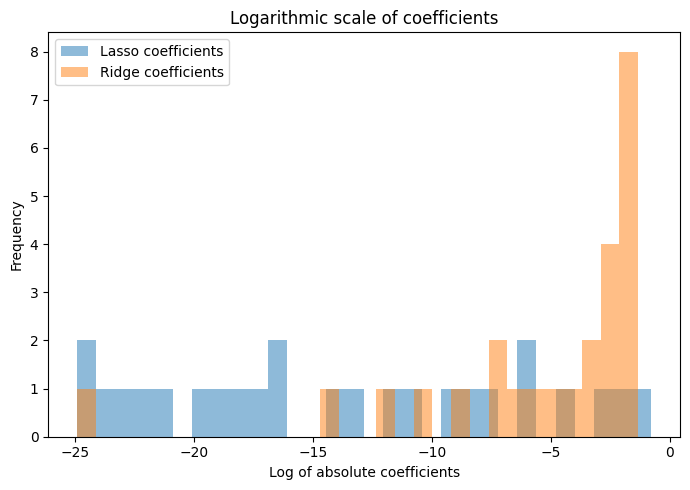

In [8]:
# Plot a logarithmic scale of the coefficients using histogram
# Preprocess zeros: replace zeros with a degree smaller than the smallest coefficient
smallest_coefficient = np.min(
    [np.min(np.abs(l1_linear_coefficients[l1_linear_coefficients != 0])),
        np.min(np.abs(l2_linear_coefficients[l2_linear_coefficients != 0]))])
l1_linear_coefficients = np.where(l1_linear_coefficients == 0, smallest_coefficient / 10, l1_linear_coefficients)
l2_linear_coefficients = np.where(l2_linear_coefficients == 0, smallest_coefficient / 10, l2_linear_coefficients)
# Plot the histogram of the logarithm of the absolute coefficients
plt.figure(figsize=(7, 5))
plt.subplot(1, 1, 1)
plt.hist(np.log10(np.abs(l1_linear_coefficients)), bins=30, alpha=0.5, label='Lasso coefficients')
plt.hist(np.log10(np.abs(l2_linear_coefficients)), bins=30, alpha=0.5, label='Ridge coefficients')
plt.title("Logarithmic scale of coefficients")
plt.xlabel('Log of absolute coefficients')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> 🤔 **THINKING**
>
> - What did you discover about the weights of the models? (Hint: Distribution of weights)
> - Hence, what is possibly one of the advantages of L1 regularization over L2 regularization? Why is it an advantage?
> - You might be seeing a `ConvergenceWarning` message when using L1 regularization. Investigate why. Hence, what is possibly one of the advantages of L2 regularization over L1 regularization?

### 1.2 Dropout

Dropout is another regularization technique used in neural networks. It works by randomly dropping out (i.e. disabling) a fraction of the neurons during training, which helps to prevent overfitting.

Let's do an experiment to get a feeling on how dropout rate (i.e. the fraction of neurons to drop out) affects the model performance. We will run a simple multilayer perceptron on the MNIST dataset, which is a **classification** task of handwritten digits.

(Reading the training code is not required. However, consider it as beneficial for future learning.)

In [9]:
# Theoretically you will only need to tweak this.
# Add different dropout rates to the model to see the results.
# Train models with different dropout rates
dropout_rates = [0.0, 0.2, 0.5, 0.8]

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Hyperparameters
input_size = 784  # 28x28 MNIST images
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Using MNIST dataset from torchvision
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                         train=True,
                                         transform=transform,
                                         download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                        train=False,
                                        transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                         batch_size=batch_size, 
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                        batch_size=batch_size, 
                                        shuffle=False)

# MLP model with configurable dropout rate
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.0):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)  # Apply dropout after activation
        out = self.fc2(out)
        return out

# Function to train model and return training/validation metrics
def train_model(dropout_rate):
    model = NeuralNet(input_size, hidden_size, num_classes, dropout_rate).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # To store metrics
    train_losses = []
    val_accuracies = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for i, (images, labels) in enumerate(train_loader):
            # Reshape images to (batch_size, input_size)
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        # Validation
        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, input_size).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
            accuracy = 100 * correct / total
            val_accuracies.append(accuracy)
        
        print(f'Dropout: {dropout_rate}, Epoch [{epoch+1}/{num_epochs}], '
              f'Loss: {epoch_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    
    return train_losses, val_accuracies


results = {}

for rate in dropout_rates:
    print(f"\nTraining model with dropout rate: {rate}")
    start_time = time.time()
    train_losses, val_accuracies = train_model(rate)
    training_time = time.time() - start_time
    
    results[rate] = {
        'train_losses': train_losses,
        'val_accuracies': val_accuracies,
        'training_time': training_time
    }
    print(f"Training completed in {training_time:.2f} seconds")

Using device: cpu

Training model with dropout rate: 0.0
Dropout: 0.0, Epoch [1/5], Loss: 0.2225, Validation Accuracy: 96.81%
Dropout: 0.0, Epoch [2/5], Loss: 0.0856, Validation Accuracy: 97.60%
Dropout: 0.0, Epoch [3/5], Loss: 0.0567, Validation Accuracy: 97.61%
Dropout: 0.0, Epoch [4/5], Loss: 0.0416, Validation Accuracy: 97.77%
Dropout: 0.0, Epoch [5/5], Loss: 0.0290, Validation Accuracy: 97.95%
Training completed in 12.93 seconds

Training model with dropout rate: 0.2
Dropout: 0.2, Epoch [1/5], Loss: 0.2375, Validation Accuracy: 96.65%
Dropout: 0.2, Epoch [2/5], Loss: 0.1039, Validation Accuracy: 97.32%
Dropout: 0.2, Epoch [3/5], Loss: 0.0748, Validation Accuracy: 97.67%
Dropout: 0.2, Epoch [4/5], Loss: 0.0584, Validation Accuracy: 97.87%
Dropout: 0.2, Epoch [5/5], Loss: 0.0504, Validation Accuracy: 98.10%
Training completed in 13.16 seconds

Training model with dropout rate: 0.5
Dropout: 0.5, Epoch [1/5], Loss: 0.2879, Validation Accuracy: 96.20%
Dropout: 0.5, Epoch [2/5], Loss: 0

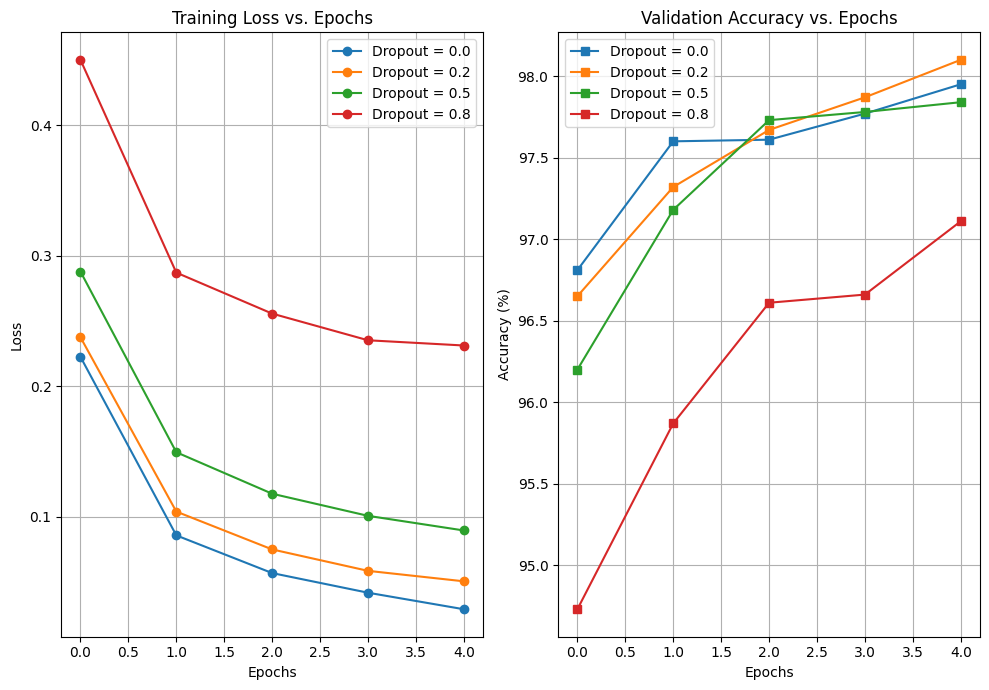


Summary of Results:
--------------------------------------------------
Dropout Rate    Final Loss      Final Accuracy  Training Time  
--------------------------------------------------
0.0             0.0290          97.95          % 12.93          s
0.2             0.0504          98.10          % 13.16          s
0.5             0.0894          97.84          % 13.45          s
0.8             0.2312          97.11          % 13.22          s


In [11]:
# Plotting results
plt.figure(figsize=(10, 7))

# Plot training losses
plt.subplot(1, 2, 1)
for rate in dropout_rates:
    plt.plot(results[rate]['train_losses'], marker='o', label=f'Dropout = {rate}')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot validation accuracies
plt.subplot(1, 2, 2)
for rate in dropout_rates:
    plt.plot(results[rate]['val_accuracies'], marker='s', label=f'Dropout = {rate}')
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary of results
print("\nSummary of Results:")
print("-" * 50)
print(f"{'Dropout Rate':<15} {'Final Loss':<15} {'Final Accuracy':<15} {'Training Time':<15}")
print("-" * 50)
for rate in dropout_rates:
    print(f"{rate:<15.1f} {results[rate]['train_losses'][-1]:<15.4f} {results[rate]['val_accuracies'][-1]:<15.2f}% {results[rate]['training_time']:<15.2f}s")

> 🤔 **THINKING**
>
> - Based on this simple example, discuss your understanding about dropout rate's impact on the model.

## 2. Normalization

In a nutshell, normalization is a technique used to scale the features and transform the data distrbution to improve training.

### 2.1 Data normalization

Sometimes you will see dataset that has one feature with a very large range of values, and another feature with a very small range of values.

This can cause problems since it will create an error surface that is very different across the dimensions.

A way to solve this is to rescale values that has $\mu = 0$ and $\sigma = 1$.

Let us see it in practice.

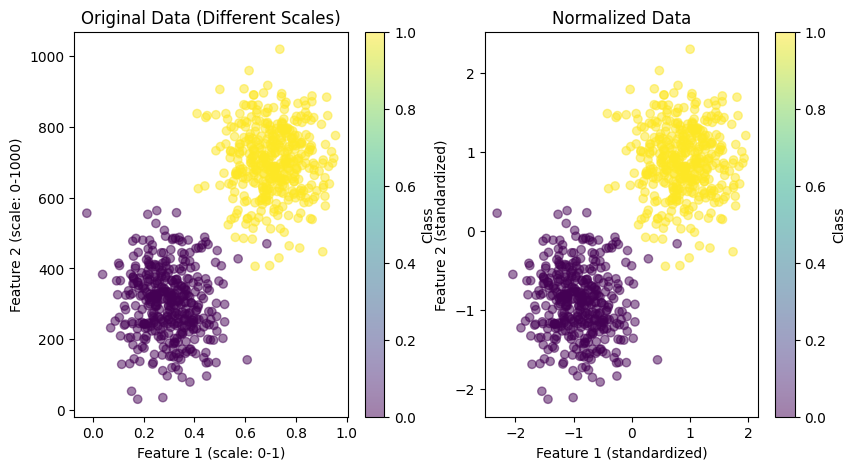

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset with different scales
def generate_synthetic_data(n_samples=1000):
    """
    Generate a synthetic dataset with two features having very different scales.
    Feature 1 ranges from 0 to 1
    Feature 2 ranges from 0 to 1000
    """
    # Class 0: Two normal distributions
    n_class_0 = n_samples // 2
    X1_class_0 = np.random.normal(0.3, 0.1, n_class_0)
    X2_class_0 = np.random.normal(300, 100, n_class_0)
    
    # Class 1: Two normal distributions
    n_class_1 = n_samples - n_class_0
    X1_class_1 = np.random.normal(0.7, 0.1, n_class_1)
    X2_class_1 = np.random.normal(700, 100, n_class_1)
    
    # Combine the features and create the labels
    X = np.vstack([
        np.column_stack([X1_class_0, X2_class_0]),
        np.column_stack([X1_class_1, X2_class_1])
    ])
    y = np.hstack([np.zeros(n_class_0), np.ones(n_class_1)])
    
    # Shuffle the dataset
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    
    return X, y

# Generate data
X, y = generate_synthetic_data(1000)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the original data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Original Data (Different Scales)')
plt.xlabel('Feature 1 (scale: 0-1)')
plt.ylabel('Feature 2 (scale: 0-1000)')
plt.colorbar(label='Class')

# Now, let's standardize the data
# Create a standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the normalized data
plt.subplot(1, 3, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('Normalized Data')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.colorbar(label='Class')

> 🤔 **THINKING**
>
> Notice how data before processing and after processing appear in the same shape, but with different scales.

Now let us compare two MLP models on the dataset with and without normalization.

In scikit-learn the training will automatically stop after convergence.

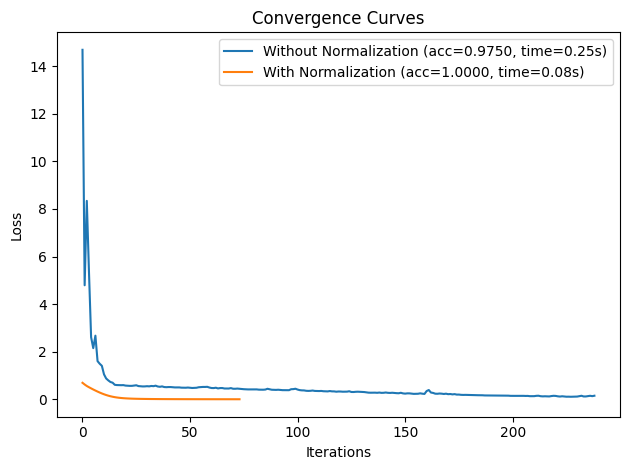

In [13]:
# Define MLP parameters
mlp_params = {
    'hidden_layer_sizes': (100, 50),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,
    'batch_size': 'auto',
    'learning_rate': 'adaptive',
    'max_iter': 1000,
    'random_state': 42
}

# Train MLP without normalization
start_time = time.time()
mlp_without_norm = MLPClassifier(**mlp_params)
mlp_without_norm.fit(X_train, y_train)
without_norm_time = time.time() - start_time
y_pred_without_norm = mlp_without_norm.predict(X_test)
accuracy_without_norm = accuracy_score(y_test, y_pred_without_norm)

# Train MLP with normalization
start_time = time.time()
mlp_with_norm = MLPClassifier(**mlp_params)
mlp_with_norm.fit(X_train_scaled, y_train)
with_norm_time = time.time() - start_time
y_pred_with_norm = mlp_with_norm.predict(X_test_scaled)
accuracy_with_norm = accuracy_score(y_test, y_pred_with_norm)

plt.plot(mlp_without_norm.loss_curve_, label=f'Without Normalization (acc={accuracy_without_norm:.4f}, time={without_norm_time:.2f}s)')
plt.plot(mlp_with_norm.loss_curve_, label=f'With Normalization (acc={accuracy_with_norm:.4f}, time={with_norm_time:.2f}s)')
plt.title('Convergence Curves')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

> 🤔 **THINKING**
>
> - What did you observe regarding the convergence speed of the two models?

### 2.2 Batch normalization and Layer normalization

Batch normalization and layer normalization are two other normalization techniques used to improve the training of deep neural networks. They could be seen as natural extensions of the data normalization technique, where the target of normalization is the variable in **each hidden layer**.

Batch normalization normalizes the inputs of each layer across the batch dimension, while layer normalization normalizes the inputs of each layer across the feature dimension.

An instinct of where batch norm and layer norm are used is that batch norm is mostly used in convolutional networks, while layer norm is mostly used in recurrent networks & transformers.
One of the reason is that layer norm normalizes within each example independently, making it better suited for sequential data and variable-length inputs.

We can check this by looking at the architecture of the models.

In [14]:
import torchvision

resnet = torchvision.models.resnet18(weights='DEFAULT')
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Notice the `bn` layers in ResNet.

> 📚 **EXERCISE**
>
> - Vision transformers (ViT) are a new architecture that is used in computer vision and is based on transformers. Try to load one and inspect its architecture like we have just done. What kind of normalization is used in the architecture?

In [15]:
# === Your code here ===

## 3. Extra: Regarding `model.eval()`

Now we have covered normalization and dropout, we can introduce the effect of `model.eval()` in PyTorch where we postponed in the previous notebooks.

Simply put, you can use `<some-model>.eval()` to set the model to evaluation mode, which mainly impacts dropout and batch normalization layers:
- Dropout layers will stop dropping out neurons, and
- Batch normalization layers will use the running mean and variance instead of the batch mean and variance. i.e. It does not update the statistics anymore, unless you call `model.train()` again. For the definition of running mean and variance, see [here](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d).

There is sometimes misunderstanding that `model.eval()` will disable the gradient computation. 
This is not true, as the gradient computation is controlled by `torch.no_grad()` context manager.

We can actually prove this by the example we provided in the dropout section.

In [16]:
model = NeuralNet(input_size, hidden_size, num_classes, dropout_rate=0.5).to(device)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [17]:
# We generate many random inputs and feed them into the model twice
# Since we know that dropouts are random, they should be different if dropout is applied

SIMULATION_COUNT = 1000
model.eval()  # Set the model to evaluation mode
for _ in range(SIMULATION_COUNT):
    x = torch.randn((1, input_size)).to(device)
    y1 = model(x)
    y2 = model(x)
    assert torch.allclose(y1, y2), f"{y1} != {y2}"

We see that indeed the model is, indeed, not randomly dropping out neurons.